In [20]:
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors

In [2]:
with open('../output.txt', 'r') as f:
    output_text = f.readlines()

In [3]:
res = [text.replace('\n', '') for text in output_text]
res = list(filter(lambda x: bool(x), res))
res = [re.findall('[\w\S]*$', text)[0] for text in res]
res = [res[i:i+5] for i in range(0, len(res), 5)]

In [4]:
ori_df = pd.DataFrame(res, columns=['epsilon', 'model', 'sim_ns', 'reward', 'success'])
ori_df['reward'] = ori_df['reward'].astype(int)
ori_df['success'] = ori_df['success'].astype(int)
ori_df['epsilon'] = ori_df['epsilon'].astype(float)
ori_df.head()
# ori_df.to_csv('output_experiment1.csv')

,epsilon,model,sim_ns,reward,success
0,0.01,agent_e0010_v0.pkl,/sim-8b567c51,480,12
1,0.10,agent_e0100_v0.pkl,/sim-6d43d8a5,200,5
2,0.50,agent_e0500_v0.pkl,/sim-d45f0711,160,4
3,1.00,agent_e1000_v0.pkl,/sim-1f07b3e1,280,7
4,0.01,agent_e0010_v0.pkl,/sim-d0a6b9ae,280,7


In [5]:
epsilons:list = ori_df['epsilon'].unique()
columns = list(map(lambda x: f'epsilon={x}', epsilons))

np_df = np.array([ori_df.loc[ori_df['epsilon'] == ep, 'success'] for ep in epsilons])
np_df = np_df.T
df = pd.DataFrame(np_df, columns=columns)
np_df = np_df / np.expand_dims(np_df.sum(axis=1),1)
normal_df = pd.DataFrame(np_df, columns=columns)

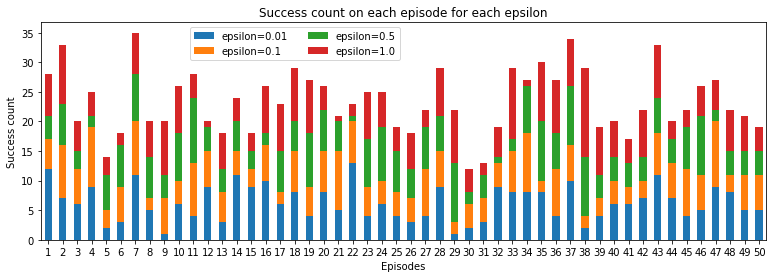

In [18]:
ax = df.plot.bar(stacked=True, figsize=(13, 4))
ax.set_xticklabels(df.index+1, rotation=0)
ax.set_xlabel('Episodes')
ax.set_ylabel('Success count')
ax.set_title('Success count on each episode for each epsilon')
ax.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.35, 1))
plt.show()

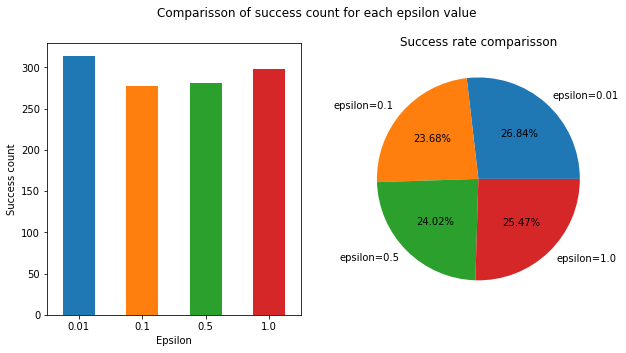

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

colors = list(matplotlib.colors.TABLEAU_COLORS.values())

ax = df.sum().plot.bar(ax=axes[0], color=colors[:4])
ax.set_xticklabels(map(lambda x: x.split('=')[1], df.columns), rotation=0)
ax.set_xlabel('Epsilon')
ax.set_ylabel('Success count')

df.sum().plot.pie(ax=axes[1], autopct='%.2f%%')
axes[1].set_ylabel(None)
axes[1].set_title('Success rate comparisson')

fig.suptitle('Comparisson of success count for each epsilon value')
plt.show()

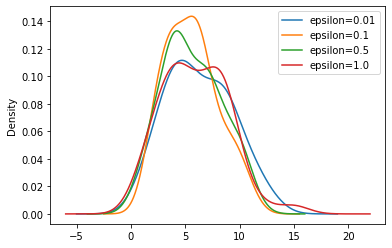

In [70]:
df.plot(kind='kde')
plt.show()